# Phishing Website Detection

## Abstract
Phishing attacks are a simple yet effective method for obtaining sensitive information from unsuspecting users, targeting critical data such as usernames, passwords, and bank account details. Cybersecurity experts are now seeking reliable detection techniques for identifying phishing websites. This paper explores the use of machine learning to detect phishing URLs by analyzing features of both legitimate and phishing URLs, employing algorithms such as Decision Tree, Random Forest, and Support Vector Machine. It aims to identify phishing URLs and determine the most effective machine learning algorithm by comparing their accuracy rates, false positive rates, and false negative rates. The pervasive nature of the Internet has not only enhanced connectivity but also provided opportunities for malicious activities like phishing. Phishers use social engineering or create fake websites to illegally obtain sensitive information. Despite various detection methods, phishers adapt to evade these mechanisms. Machine learning has proven to be a powerful tool in identifying common characteristics of phishing attacks.


## Goal


The aim of this project is to develop a detection model capable of identifying phishing websites based on multiple factors, employing machine learning algorithms.

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data=pd.read_csv(r"C:\Users\tangk\Downloads\phishing\phishing.csv")

In [3]:
data.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [4]:
data.shape

(11054, 32)

In [5]:
data.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [6]:
data.info

<bound method DataFrame.info of        Index  UsingIP  LongURL  ShortURL  Symbol@  Redirecting//  \
0          0        1        1         1        1              1   
1          1        1        0         1        1              1   
2          2        1        0         1        1              1   
3          3        1        0        -1        1              1   
4          4       -1        0        -1        1             -1   
...      ...      ...      ...       ...      ...            ...   
11049  11049        1       -1         1       -1              1   
11050  11050       -1        1         1       -1             -1   
11051  11051        1       -1         1        1              1   
11052  11052       -1       -1         1        1              1   
11053  11053       -1       -1         1        1              1   

       PrefixSuffix-  SubDomains  HTTPS  DomainRegLen  ...  UsingPopupWindow  \
0                 -1           0      1            -1  ...             

In [7]:
data.isnull().sum()

Index                  0
UsingIP                0
LongURL                0
ShortURL               0
Symbol@                0
Redirecting//          0
PrefixSuffix-          0
SubDomains             0
HTTPS                  0
DomainRegLen           0
Favicon                0
NonStdPort             0
HTTPSDomainURL         0
RequestURL             0
AnchorURL              0
LinksInScriptTags      0
ServerFormHandler      0
InfoEmail              0
AbnormalURL            0
WebsiteForwarding      0
StatusBarCust          0
DisableRightClick      0
UsingPopupWindow       0
IframeRedirection      0
AgeofDomain            0
DNSRecording           0
WebsiteTraffic         0
PageRank               0
GoogleIndex            0
LinksPointingToPage    0
StatsReport            0
class                  0
dtype: int64

In [8]:
data.nunique()

Index                  11054
UsingIP                    2
LongURL                    3
ShortURL                   2
Symbol@                    2
Redirecting//              2
PrefixSuffix-              2
SubDomains                 3
HTTPS                      3
DomainRegLen               2
Favicon                    2
NonStdPort                 2
HTTPSDomainURL             2
RequestURL                 2
AnchorURL                  3
LinksInScriptTags          3
ServerFormHandler          3
InfoEmail                  2
AbnormalURL                2
WebsiteForwarding          2
StatusBarCust              2
DisableRightClick          2
UsingPopupWindow           2
IframeRedirection          2
AgeofDomain                2
DNSRecording               2
WebsiteTraffic             3
PageRank                   2
GoogleIndex                2
LinksPointingToPage        3
StatsReport                2
class                      2
dtype: int64

In [9]:
data = data.drop(['Index'],axis = 1)

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
UsingIP,11054.0,0.313914,0.949495,-1.0,-1.0,1.0,1.0,1.0
LongURL,11054.0,-0.633345,0.765973,-1.0,-1.0,-1.0,-1.0,1.0
ShortURL,11054.0,0.738737,0.674024,-1.0,1.0,1.0,1.0,1.0
Symbol@,11054.0,0.700561,0.713625,-1.0,1.0,1.0,1.0,1.0
Redirecting//,11054.0,0.741632,0.670837,-1.0,1.0,1.0,1.0,1.0
PrefixSuffix-,11054.0,-0.734938,0.678165,-1.0,-1.0,-1.0,-1.0,1.0
SubDomains,11054.0,0.064049,0.817492,-1.0,-1.0,0.0,1.0,1.0
HTTPS,11054.0,0.251040,0.911856,-1.0,-1.0,1.0,1.0,1.0
DomainRegLen,11054.0,-0.336711,0.941651,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11054.0,0.628551,0.777804,-1.0,1.0,1.0,1.0,1.0


 ## Exploratory Data Analysis (EDA):

array([[<AxesSubplot:title={'center':'UsingIP'}>,
        <AxesSubplot:title={'center':'LongURL'}>,
        <AxesSubplot:title={'center':'ShortURL'}>,
        <AxesSubplot:title={'center':'Symbol@'}>,
        <AxesSubplot:title={'center':'Redirecting//'}>,
        <AxesSubplot:title={'center':'PrefixSuffix-'}>],
       [<AxesSubplot:title={'center':'SubDomains'}>,
        <AxesSubplot:title={'center':'HTTPS'}>,
        <AxesSubplot:title={'center':'DomainRegLen'}>,
        <AxesSubplot:title={'center':'Favicon'}>,
        <AxesSubplot:title={'center':'NonStdPort'}>,
        <AxesSubplot:title={'center':'HTTPSDomainURL'}>],
       [<AxesSubplot:title={'center':'RequestURL'}>,
        <AxesSubplot:title={'center':'AnchorURL'}>,
        <AxesSubplot:title={'center':'LinksInScriptTags'}>,
        <AxesSubplot:title={'center':'ServerFormHandler'}>,
        <AxesSubplot:title={'center':'InfoEmail'}>,
        <AxesSubplot:title={'center':'AbnormalURL'}>],
       [<AxesSubplot:title={'center':

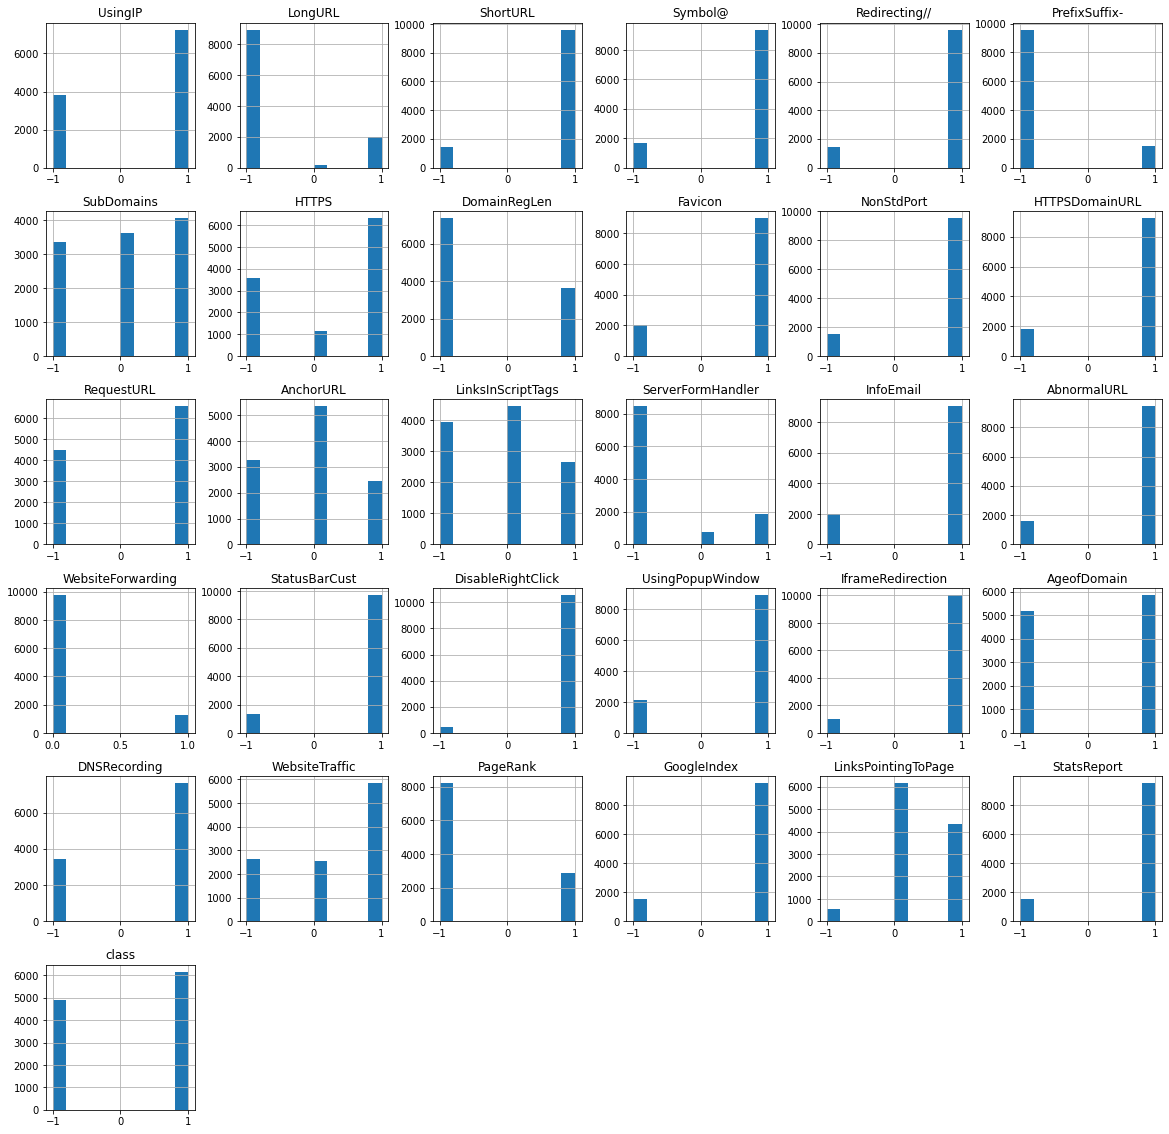

In [11]:
data.hist(figsize=(20,20))

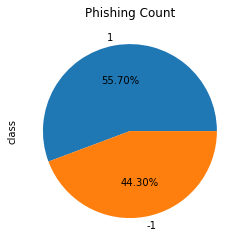

In [12]:
data['class'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

## Classification: 

The following models that i am  going to use:

1. Logistic Regression

2. KNN algorithm 

3. Decision Tree

4. Support Vector Machine Algorithm

5. Gradient Boosting 

6. AdaBoosting Classifier 

7. Random Tree

In [13]:
X= data.drop(columns='class')
X.head()

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,DisableRightClick,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport
0,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1
1,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,1,0,-1
2,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
3,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,1,-1,-1,0,-1,1,1,1
4,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,1,-1,1,-1,-1


In [14]:
Y=data['class']
Y=pd.DataFrame(Y)
Y.head()

,class
0,-1
1,-1
2,-1
3,1
4,1


## Data Splitting:

In [15]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.3,random_state=2)

In [16]:
print(train_X.shape)
print(test_X.shape)
print(train_Y.shape)
print(test_Y.shape)

(7737, 30)
(3317, 30)
(7737, 1)
(3317, 1)


## Logistic Regression:

In [17]:
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [18]:
logreg=LogisticRegression()
model_1=logreg.fit(train_X,train_Y)

In [19]:
logreg_predict= model_1.predict(test_X)

In [20]:
accuracy_score(logreg_predict,test_Y)

0.9243292131444076

In [21]:
print(classification_report(logreg_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.89      0.93      0.91      1401
           1       0.95      0.92      0.93      1916

    accuracy                           0.92      3317
   macro avg       0.92      0.93      0.92      3317
weighted avg       0.93      0.92      0.92      3317



In [22]:
def plot_confusion_matrix(test_Y, predict_y):
 C = confusion_matrix(test_Y, predict_y)
 A =(((C.T)/(C.sum(axis=1))).T)
 B =(C/C.sum(axis=0))
 plt.figure(figsize=(20,4))
 labels = [1,2]
 cmap=sns.light_palette("blue")
 plt.subplot(1, 3, 1)
 sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Confusion matrix")
 plt.subplot(1, 3, 2)
 sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Precision matrix")
 plt.subplot(1, 3, 3)
 sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Recall matrix")
 plt.show()

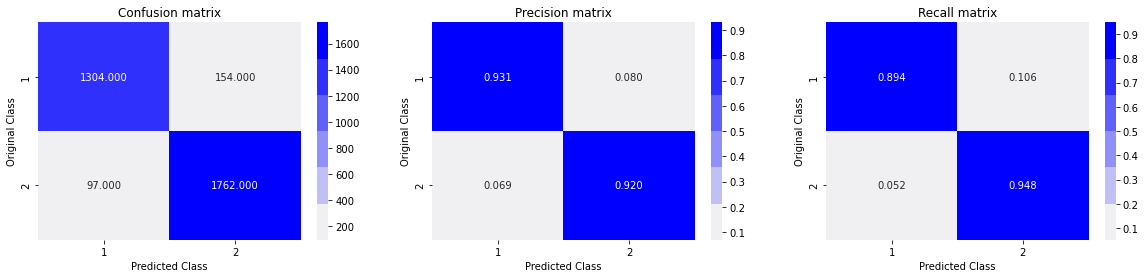

In [23]:
plot_confusion_matrix(test_Y, logreg_predict)

## K-Nearest Neighbours Algorithm:

In [24]:
knn=KNeighborsClassifier(n_neighbors=3)
model_2= knn.fit(train_X,train_Y)

In [25]:
knn_predict=model_2.predict(test_X)

In [26]:
accuracy_score(knn_predict,test_Y)

0.9424178474525173

In [27]:
print(classification_report(test_Y,knn_predict))

              precision    recall  f1-score   support

          -1       0.94      0.93      0.93      1458
           1       0.94      0.95      0.95      1859

    accuracy                           0.94      3317
   macro avg       0.94      0.94      0.94      3317
weighted avg       0.94      0.94      0.94      3317



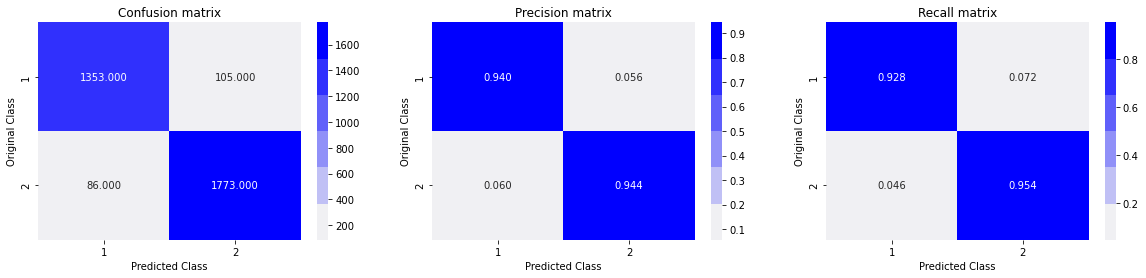

In [28]:
plot_confusion_matrix(test_Y, knn_predict)

## Decision Trees Classifier

In [29]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree.fit(train_X, train_Y)

DecisionTreeClassifier(max_depth=30)

In [30]:
y_train_tree = tree.predict(train_X)
y_test_tree = tree.predict(test_X)

In [31]:

acc_train_tree = metrics.accuracy_score(train_Y,y_train_tree)
acc_test_tree = metrics.accuracy_score(test_Y,y_test_tree)
print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))
print()

f1_score_train_tree = metrics.f1_score(train_Y,y_train_tree)
f1_score_test_tree = metrics.f1_score(test_Y,y_test_tree)
print("Decision Tree : f1_score on training Data: {:.3f}".format(f1_score_train_tree))
print("Decision Tree : f1_score on test Data: {:.3f}".format(f1_score_test_tree))
print()

recall_score_train_tree = metrics.recall_score(train_Y,y_train_tree)
recall_score_test_tree = metrics.recall_score(test_Y,y_test_tree)
print("Decision Tree : Recall on training Data: {:.3f}".format(recall_score_train_tree))
print("Decision Tree : Recall on test Data: {:.3f}".format(recall_score_test_tree))
print()

precision_score_train_tree = metrics.precision_score(train_Y,y_train_tree)
precision_score_test_tree = metrics.precision_score(test_Y,y_test_tree)
print("Decision Tree : precision on training Data: {:.3f}".format(precision_score_train_tree))
print("Decision Tree : precision on test Data: {:.3f}".format(precision_score_test_tree))
print()

mae_score_train_tree = metrics.mean_absolute_error(train_Y,y_train_tree)
mae_score_test_tree = metrics.mean_absolute_error(test_Y,y_test_tree)
print("Decision Tree : MAE on training Data: {:.3f}".format(mae_score_train_tree))
print("Decision Tree : MAE on test Data: {:.3f}".format(mae_score_test_tree))

Decision Tree : Accuracy on training Data: 0.991
Decision Tree : Accuracy on test Data: 0.961

Decision Tree : f1_score on training Data: 0.992
Decision Tree : f1_score on test Data: 0.966

Decision Tree : Recall on training Data: 0.992
Decision Tree : Recall on test Data: 0.969

Decision Tree : precision on training Data: 0.991
Decision Tree : precision on test Data: 0.962

Decision Tree : MAE on training Data: 0.018
Decision Tree : MAE on test Data: 0.077


In [32]:
print(metrics.classification_report(test_Y, y_test_tree))

              precision    recall  f1-score   support

          -1       0.96      0.95      0.96      1458
           1       0.96      0.97      0.97      1859

    accuracy                           0.96      3317
   macro avg       0.96      0.96      0.96      3317
weighted avg       0.96      0.96      0.96      3317



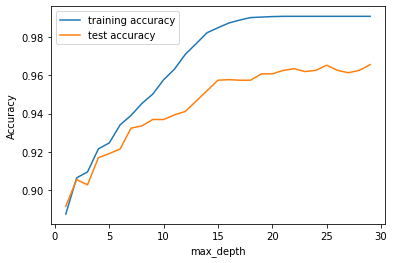

In [33]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(train_X, train_Y)
    # record training set accuracy
    training_accuracy.append(tree_test.score(train_X, train_Y))
    # record generalization accuracy
    test_accuracy.append(tree_test.score(test_X, test_Y))
    

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

## Random Forest Classifier Algorithm

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rfc=RandomForestClassifier()
model_4=rfc.fit(train_X,train_Y)

In [36]:
rfc_predict=model_4.predict(test_X)
accuracy_score(rfc_predict,test_Y)

0.9743744347301778

In [37]:
print(classification_report(rfc_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.96      0.98      0.97      1433
           1       0.98      0.97      0.98      1884

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



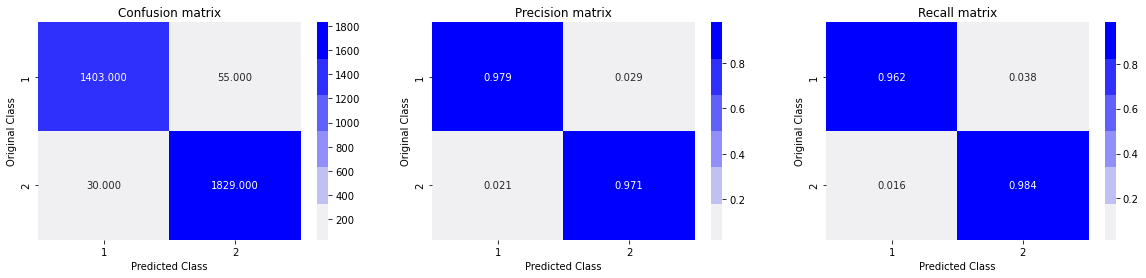

In [38]:
plot_confusion_matrix(test_Y, rfc_predict)

## Support Vector Machine Algorithm

In [39]:
from sklearn.svm import SVC

In [40]:
svc=SVC()
model_5=svc.fit(train_X,train_Y)
svm_predict=model_5.predict(test_X)
accuracy_score(svm_predict,test_Y)

0.9472414832680133

In [41]:
print(classification_report(svm_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.92      0.96      0.94      1397
           1       0.97      0.94      0.95      1920

    accuracy                           0.95      3317
   macro avg       0.94      0.95      0.95      3317
weighted avg       0.95      0.95      0.95      3317



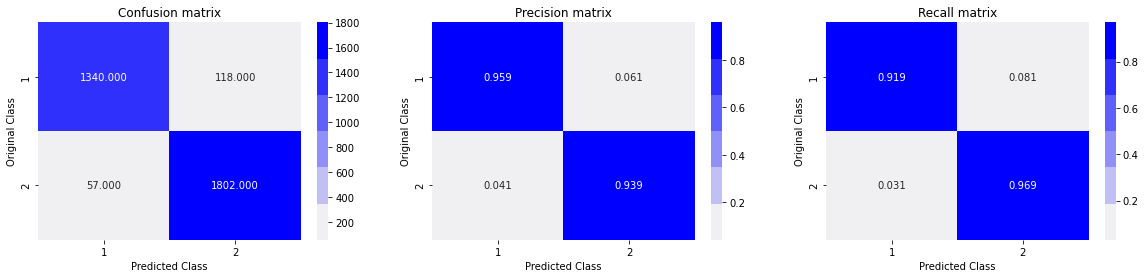

In [42]:
plot_confusion_matrix(test_Y, svm_predict)

## AdaBoost Classifier

In [43]:
from sklearn.ensemble import AdaBoostClassifier

In [44]:
adc=AdaBoostClassifier(n_estimators=5,learning_rate=1)
model_6=adc.fit(train_X,train_Y)

In [45]:
adc_predict=model_6.predict(test_X)
accuracy_score(adc_predict,test_Y)

0.9104612601748568

In [46]:
print(classification_report(adc_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.88      0.91      0.90      1403
           1       0.93      0.91      0.92      1914

    accuracy                           0.91      3317
   macro avg       0.91      0.91      0.91      3317
weighted avg       0.91      0.91      0.91      3317



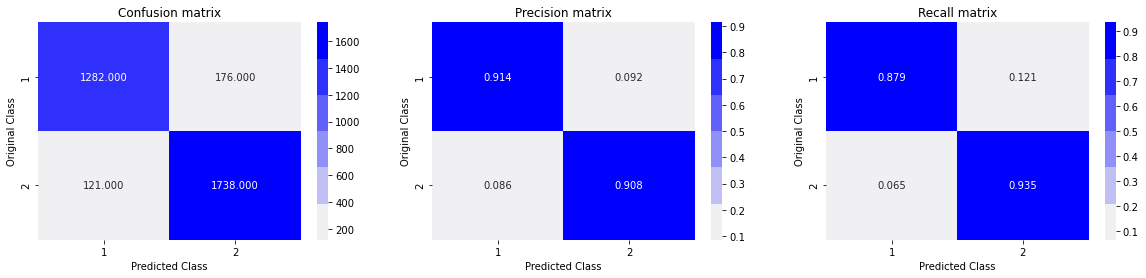

In [47]:
plot_confusion_matrix(test_Y, adc_predict)

## Gradient Boosting Classifier

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)
 
gbc.fit(train_X,train_Y)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [49]:
y_train_gbc = gbc.predict(train_X)
y_test_gbc = gbc.predict(test_X)

In [50]:
acc_train_gbc = metrics.accuracy_score(train_Y,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(test_Y,y_test_gbc)
print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(train_Y,y_train_gbc)
f1_score_test_gbc = metrics.f1_score(test_Y,y_test_gbc)
print("Gradient Boosting Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("Gradient Boosting Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))
print()

recall_score_train_gbc = metrics.recall_score(train_Y,y_train_gbc)
recall_score_test_gbc =  metrics.recall_score(test_Y,y_test_gbc)
print("Gradient Boosting Classifier : Recall on training Data: {:.3f}".format(recall_score_train_gbc))
print("Gradient Boosting Classifier : Recall on test Data: {:.3f}".format(recall_score_test_gbc))
print()

precision_score_train_gbc = metrics.precision_score(train_Y,y_train_gbc)
precision_score_test_gbc = metrics.precision_score(test_Y,y_test_gbc)
print("Gradient Boosting Classifier : precision on training Data: {:.3f}".format(precision_score_train_gbc))
print("Gradient Boosting Classifier : precision on test Data: {:.3f}".format(precision_score_test_gbc))
print()

mae_score_train_gbc = metrics.mean_absolute_error(train_Y,y_train_gbc)
mae_score_test_gbc = metrics.mean_absolute_error(test_Y,y_test_gbc)
print("Gradient Boosting Classifier : MAE on training Data: {:.3f}".format(mae_score_train_gbc))
print("Gradient Boosting Classifier : MAE on test Data: {:.3f}".format(mae_score_test_gbc))

Gradient Boosting Classifier : Accuracy on training Data: 0.989
Gradient Boosting Classifier : Accuracy on test Data: 0.970

Gradient Boosting Classifier : f1_score on training Data: 0.990
Gradient Boosting Classifier : f1_score on test Data: 0.974

Gradient Boosting Classifier : Recall on training Data: 0.994
Gradient Boosting Classifier : Recall on test Data: 0.981

Gradient Boosting Classifier : precision on training Data: 0.986
Gradient Boosting Classifier : precision on test Data: 0.967

Gradient Boosting Classifier : MAE on training Data: 0.022
Gradient Boosting Classifier : MAE on test Data: 0.060


In [51]:
print(metrics.classification_report(test_Y, y_test_gbc))

              precision    recall  f1-score   support

          -1       0.97      0.96      0.97      1458
           1       0.97      0.98      0.97      1859

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



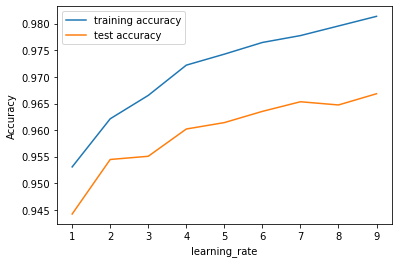

In [52]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  GradientBoostingClassifier(learning_rate = n*0.1)

    forest_test.fit(train_X, train_Y)
    # record training set accuracy
    training_accuracy.append(forest_test.score(train_X, train_Y))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(test_X, test_Y))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

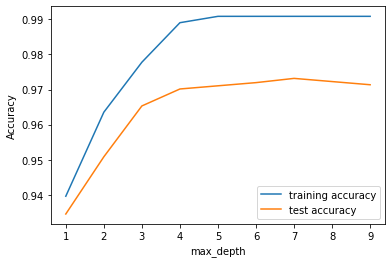

In [53]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10,1)
for n in depth:
    forest_test =  GradientBoostingClassifier(max_depth=n,learning_rate = 0.7)

    forest_test.fit(train_X, train_Y)
    # record training set accuracy
    training_accuracy.append(forest_test.score(train_X, train_Y))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(test_X, test_Y))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

### Results

Logistic Regression Accuracy: 0.9243292131444076

K-Nearest Neighbour Accuracy: 0.9424178474525173

Decision Trees Classifier Accuracy: 0.9614589596329812

Random Forest Classifier Accuracy: 0.9743744347301778

support Vector Machine Accuracy: 0.9472414832680133

Adaboost Classifier Accuracy: 0.9104612601748568

In [60]:
data.columns

Index(['UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [61]:
X=data[['PrefixSuffix-','AnchorURL']]
X.head()

,PrefixSuffix-,AnchorURL
0,-1,0
1,-1,0
2,-1,0
3,-1,0
4,-1,0


In [62]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.3,random_state=2)

In [63]:
print(train_X.shape)
print(test_X.shape)
print(train_Y.shape)
print(test_Y.shape)

(7737, 2)
(3317, 2)
(7737, 1)
(3317, 1)


In [64]:
model_8=logreg.fit(train_X,train_Y)

In [65]:
logreg_predict=model_8.predict(test_X)

In [66]:
accuracy_score(test_Y,logreg_predict)

0.8411214953271028

In [67]:
logreg.classes_

array([-1,  1], dtype=int64)

In [68]:
x = np.array(X)
x

array([[-1,  0],
       [-1,  0],
       [-1,  0],
       ...,
       [-1,  0],
       [-1, -1],
       [-1, -1]], dtype=int64)

In [71]:
#X = X.to_numpy()
y = data['class']
y= y.to_numpy()

In [79]:
from mlxtend.plotting import plot_decision_regions

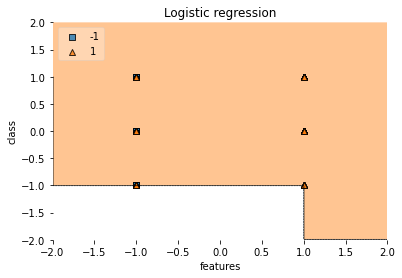

In [80]:
plot_decision_regions(x, y, clf=model_1, legend=2)

# Adding axes annotations
plt.xlabel('features')
plt.ylabel('class')
plt.title('Logistic regression')
plt.show()